In [13]:
%matplotlib inline
from dolfin import *
from matplotlib import pyplot as plt

In [14]:
#meshing
mesh = UnitSquareMesh(32, 32)
V = FunctionSpace(mesh, "Lagrange", 2)

#boundary x=0, or x=1
def boundary(x):
    return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS

#B.C
u0 = Constant(0.0)
bc = DirichletBC(V, u0, boundary)

In [15]:
#variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)", degree=2)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


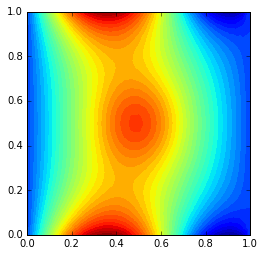

In [16]:
g = Expression("sin(5*x[0])", degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx + g*v*ds

#compute solution
u = Function(V)
solve(a == L, u, bc)

#save sol to VTK format
file = File("Poisson.pvd")
file << u

#plot solution
plot(u, interactive=True)